<a href="https://colab.research.google.com/github/Htetmin5235/myfirstproject/blob/master/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.impute
import sklearn.preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pd.set_option("display.width", 70)

In [0]:
data = pd.read_csv("googleplaystore.csv")

In [45]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [52]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [53]:
data.shape

(10841, 13)

In [54]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

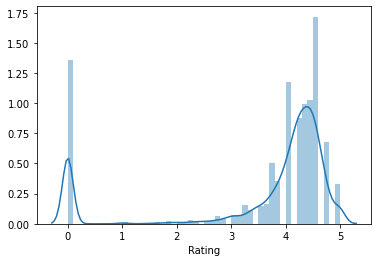

In [55]:
sns.distplot(data["Rating"].fillna(0));

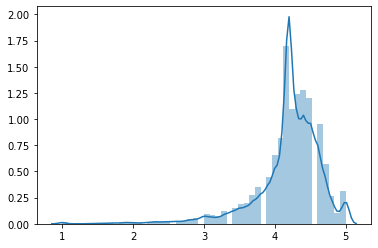

In [19]:
mean_imp = sklearn.impute.SimpleImputer(strategy="mean")
mean_rat = mean_imp.fit_transform(data[["Rating"]])
sns.distplot(mean_rat);

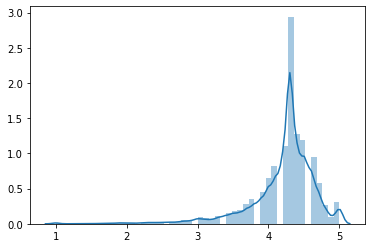

In [20]:
med_imp = sklearn.impute.SimpleImputer(strategy="median")
med_rat = med_imp.fit_transform(data[["Rating"]])
sns.distplot(med_rat);

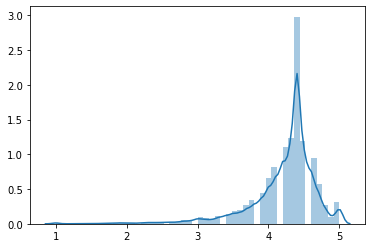

In [21]:
freq_imp = sklearn.impute.SimpleImputer(strategy="most_frequent")
freq_rat = freq_imp.fit_transform(data[["Rating"]])
sns.distplot(freq_rat);

In [0]:
data["Rating"] = mean_rat

In [23]:
types = data["Type"].dropna().astype(str)
types.value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [24]:
le = sklearn.preprocessing.LabelEncoder()
type_le = le.fit_transform(types)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[0 1]


array(['Free', 'Paid'], dtype=object)

In [25]:
type_oh = pd.get_dummies(types)
type_oh.head()

,Free,Paid
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [26]:
type_oh[type_oh["Paid"] == 1].head()

,Free,Paid
234,0,1
235,0,1
290,0,1
291,0,1
427,0,1


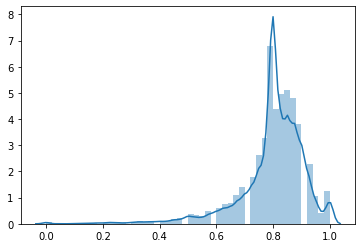

In [27]:
mm = sklearn.preprocessing.MinMaxScaler()
sns.distplot(mm.fit_transform(data[["Rating"]]));

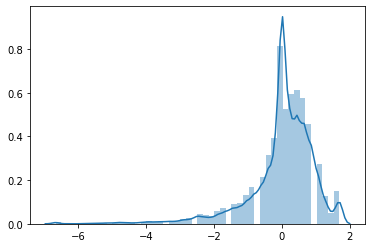

In [28]:
ss = sklearn.preprocessing.StandardScaler()
sns.distplot(ss.fit_transform(data[["Rating"]]));